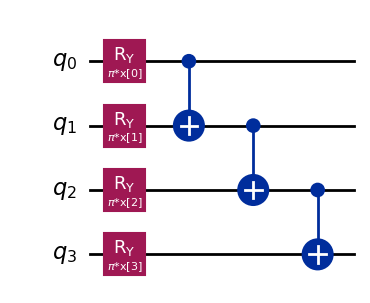

In [1]:
from ionqvision.ansatze.ansatz_library import AngleEncoder
encoder = AngleEncoder(num_qubits=4)
encoder.draw("mpl")

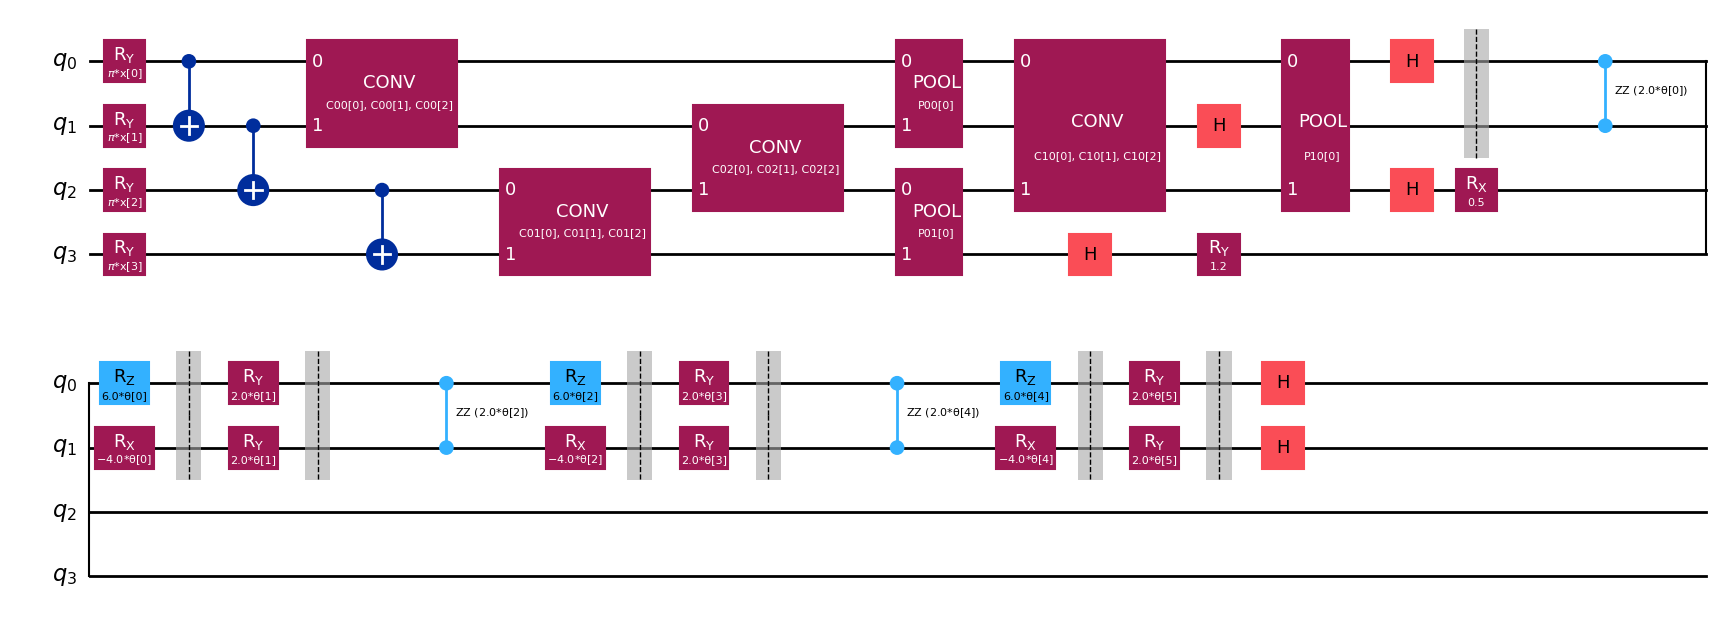

In [14]:
from qiskit import QuantumCircuit
from ionqvision.ansatze.ansatz_library import QAOAAnsatz, QCNNAnsatz, AngleEncoder
from qiskit.quantum_info import SparsePauliOp

# example Hamiltonian for QAOA Ansatz
hamiltonian = SparsePauliOp.from_list([("ZZ", 1), ("XI", -2), ("IZ", 3)])
qaoa = QAOAAnsatz(hamiltonian, multi_angle=False, depth=3, rot="Y")

# create a QCNN Ansatz with 4 qubits
qcnn = QCNNAnsatz(num_qubits=4, filter_depth=2)

# create a custom encoder (scene enrichment)
encoder = AngleEncoder(num_qubits=4)

# create a combined circuit
combined_circuit = QuantumCircuit(4)

# append the Encoder circuit first (scene enrichment)
combined_circuit.compose(encoder, inplace=True)

# append the QCNN circuit (neural network part)
combined_circuit.compose(qcnn, inplace=True)

# append the QAOA circuit (symbolic reasoning)
combined_circuit.compose(qaoa, inplace=True)

# optionally, add custom gates for further enrichment
combined_circuit.h([0, 1, 2, 3])  # apply Hadamard gate on all qubits
combined_circuit.rx(0.5, 2)       # apply RX gate with angle 0.5 on qubit 2
combined_circuit.ry(1.2, 3)       # apply RY gate with angle 1.2 on qubit 3

# draw the enriched combined circuit
combined_circuit.draw("mpl")

In [15]:
from qiskit.quantum_info import SparsePauliOp
# measure the expectation value of X_0, Y_0, Z_0
quantum_features = [
    SparsePauliOp(["IIIX"]), 
    SparsePauliOp(["IIIY"]), 
    SparsePauliOp(["IIIZ"])
]

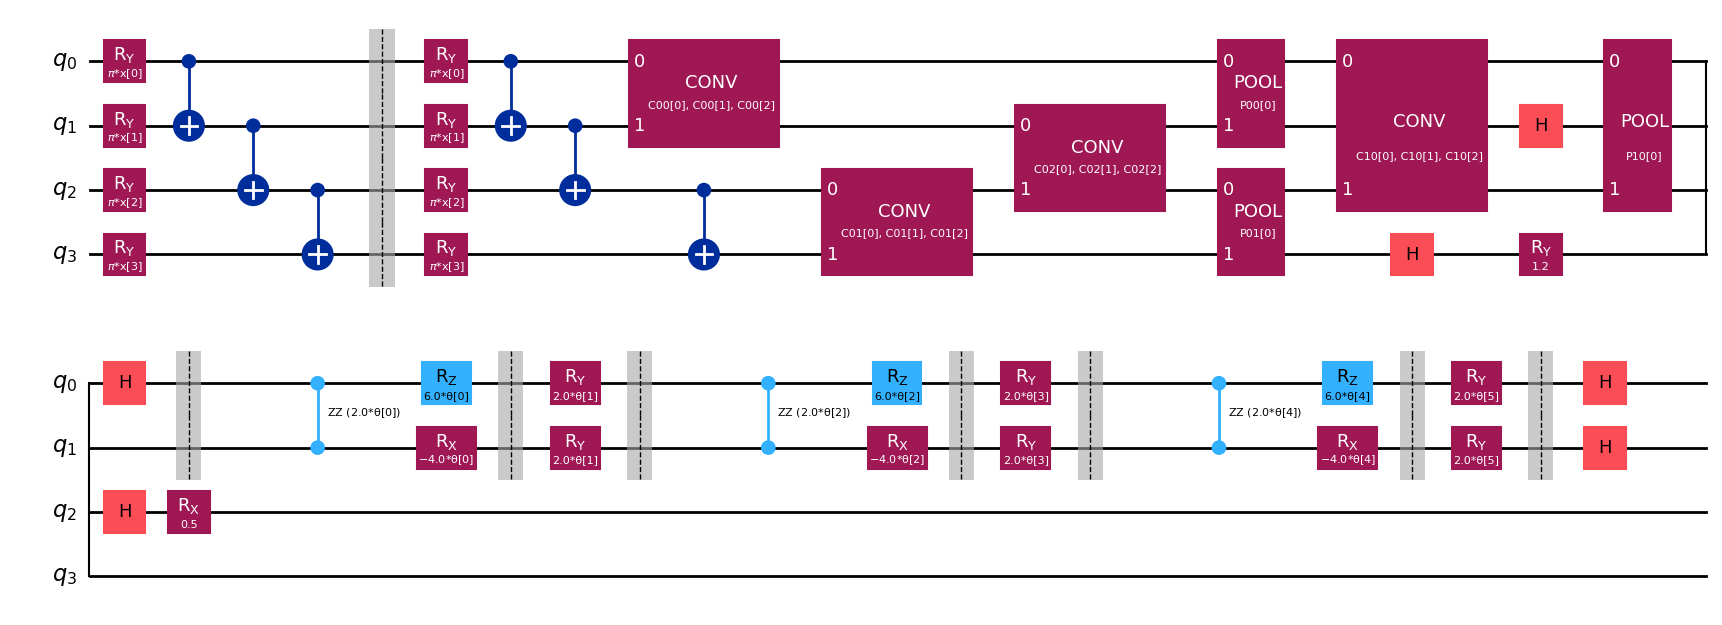

In [18]:
from ionqvision.modules import BinaryMNISTClassifier
# set up your classifier and inspect its architecture
classifier = BinaryMNISTClassifier(encoder, combined_circuit, quantum_features) 

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)  # suppress all logging messages

# check out your quantum layer
classifier.quantum_layer.layer_qc.draw("mpl")

In [19]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)


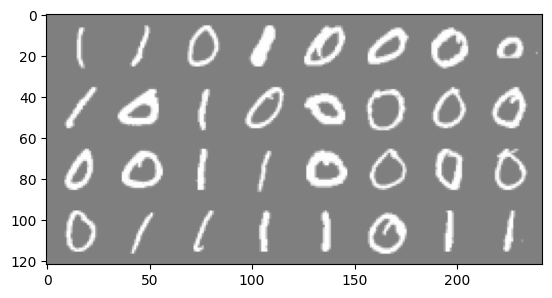

In [20]:
# Verify the images loaded correctly
classifier.visualize_batch()

In [8]:
# from qbraid.runtime import QbraidSession
# from ionqvision.scq_client import IonQSCQClient

# session = QbraidSession()

# client = IonQSCQClient(session=session)

In [9]:
# submission_data = classifier.submit_model_for_grading(client=client)

# message = submission_data.get("message")
# submission_id = submission_data.get("submissionId")

# print(message)

In [10]:
# client.await_autograder_result(submission_id=submission_id)